## LangGraph 워크플로우 테스트 및 시각화

이 노트북은 `langgraph`를 사용하여 간단한 워크플로우를 생성하고, `langchain_teddynote`의 `get_graphviz_graph` 함수로 시각화하는 예제입니다.

**사전 준비:**
1. `langgraph`, `langchain-openai`, `langchain-teddynote` 라이브러리가 설치되어 있어야 합니다.
2. 이 예제는 OpenAI API를 사용하므로, 실행 전에 `OPENAI_API_KEY` 환경 변수를 설정하거나 아래 코드 셀에서 직접 입력해야 합니다.

In [1]:
import os
import getpass
from typing import TypedDict, Annotated
import operator

from langchain_core.messages import HumanMessage, BaseMessage
from langgraph.graph import StateGraph, END
from langchain_teddynote.graphs import visualize_graph

### 1. 그래프 상태(State) 정의

그래프의 상태를 정의합니다. `messages`는 대화 기록을 저장합니다.

In [2]:
class AgentState(TypedDict):
    messages: Annotated[list[BaseMessage], operator.add]

### 2. 노드(Node) 정의

LLM을 호출하여 응답을 생성하는 노드를 정의합니다.

In [3]:
def call_model(state: AgentState):
    pass

### 3. 그래프 생성 및 엣지(Edge) 연결

상태와 노드를 사용하여 워크플로우 그래프를 구성합니다.

In [4]:
# 워크플로우 객체 생성
workflow = StateGraph(AgentState)

# 노드 추가
workflow.add_node("agent", call_model)

# 진입점(Entry Point) 설정
workflow.set_entry_point("agent")

# 종료점(Finish Point) 설정
workflow.add_edge("agent", END)

### 4. 그래프 컴파일 및 시각화

정의된 워크플로우를 컴파일하고, `get_graphviz_graph`를 사용하여 시각화합니다.

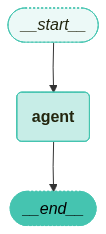

In [6]:
# 그래프 컴파일
app = workflow.compile()

# 그래프 시각화
graph = visualize_graph(app)
graph # Jupyter Notebook에서 바로 확인